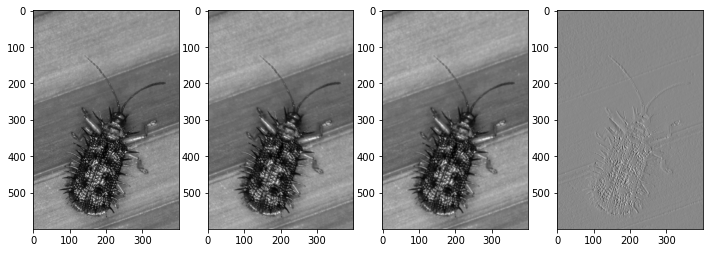

In [13]:
import numpy as np
import cv2 
from scipy import signal
import matplotlib.pyplot as plt

def convolve(image, kernel):
    # grab the spatial dimensions of the image, along with
    # the spatial dimensions of the kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    # allocate memory for the output image, taking care to
    # "pad" the borders of the input image so the spatial
    # size (i.e., width and height) are not reduced
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
    cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    return output 
    
if __name__ == "__main__":
   
    # read image 
    image_color = cv2.imread("data/Hispine.jpg", cv2.IMREAD_COLOR)
    image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
        
    image_gray  =  cv2.imread(image, cv2.IMREAD_GRAYSCALE)
 
    # resize 
    image_color = cv2.resize (image_color, (400, 600))
    image_gray  = cv2.resize (image_gray, (400, 600))
    
    kernel1 = np.array ([[1,0,0],[0,1,1],[0,0,1]])
    kernel2 = np.array ([[1,1,1],[1,1,1],[1,1,1]])
    kernel3 = np.array ([[-1,0,1],[-2,0,2],[-1,0,1]])
            
    image1 = signal.convolve2d(image_gray, kernel1, boundary='symm', mode='same')
    image2 = signal.convolve2d(image_gray, kernel2, boundary='symm', mode='same')
    image3 = signal.convolve2d(image_gray, kernel3, boundary='symm', mode='same')
    
    fig, axs = plt.subplots (1,4,figsize=(12,6))
    
    
    axs[0].imshow (image_gray,cmap='gray')
    axs[1].imshow (image1,cmap='gray')
    axs[2].imshow (image2,cmap='gray')
    axs[3].imshow (image3,cmap='gray')
    
    plt.show()

Kernel
 [[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]


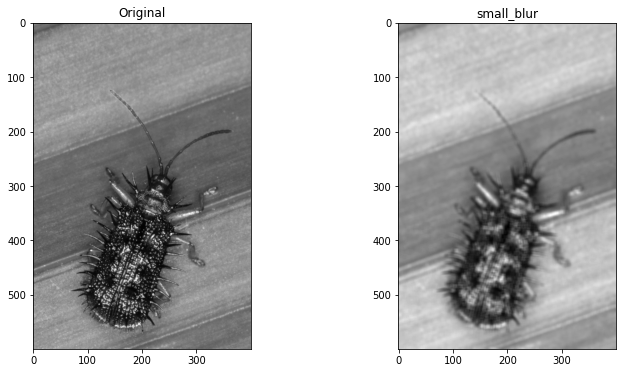

Kernel
 [[0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757]
 [0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757]
 [0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757]
 [0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757]
 [0.00226757 0.00226757 0.002267

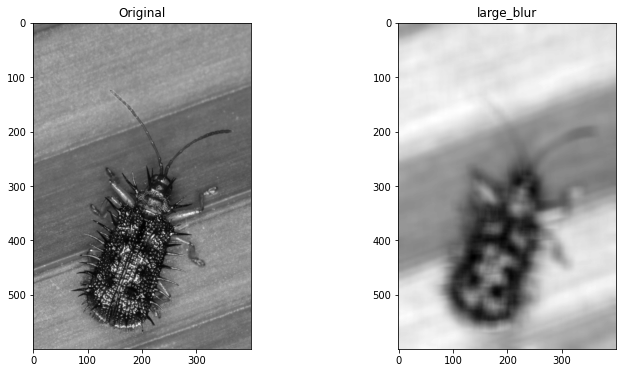

Kernel
 [[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


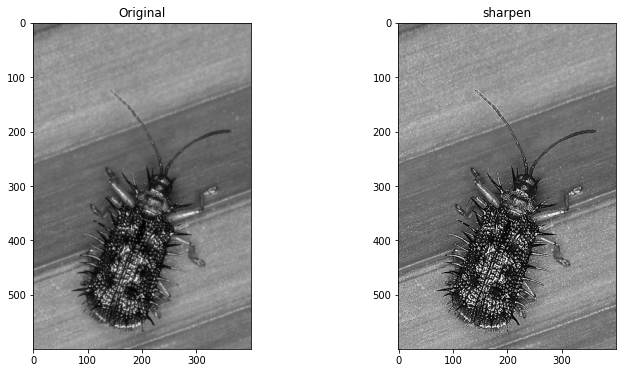

Kernel
 [[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


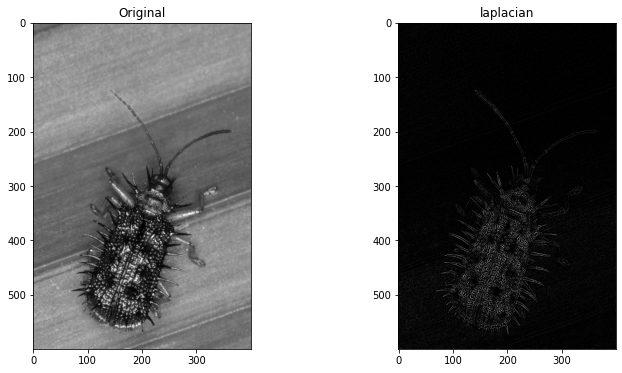

Kernel
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


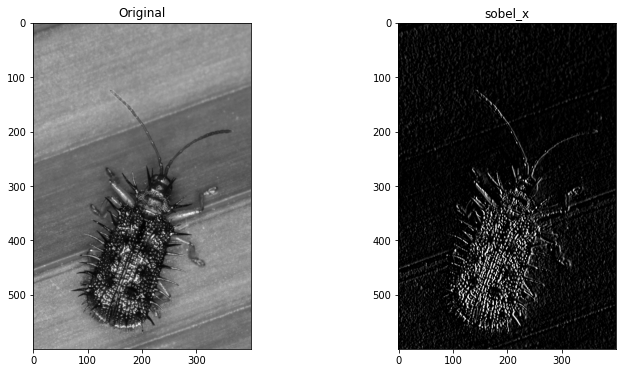

Kernel
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


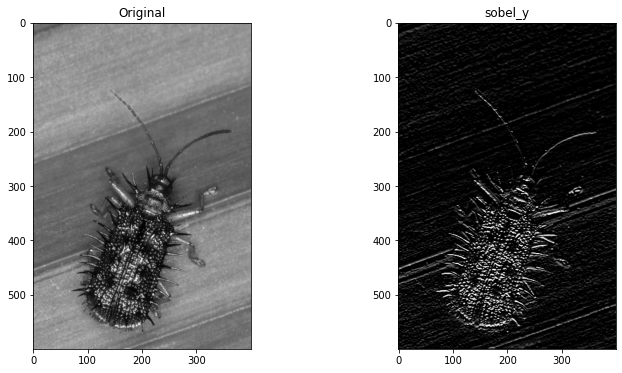

In [20]:

    # construct average blurring kernels used to smooth an image
    smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
    largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

    sharpen = np.array(([0, -1, 0],[-1, 5, -1],[0, -1, 0]), dtype="int")
    
    
    # construct the Laplacian kernel used to detect edge-like# regions of an image
    laplacian = np.array(([0, 1, 0],[1, -4, 1],[0, 1, 0]), dtype="int")

    # construct the Sobel x-axis kernel
    sobelX = np.array(([-1, 0, 1],[-2, 0, 2],[-1, 0, 1]), dtype="int")

    # construct the Sobel y-axis kernel
    sobelY = np.array(([-1, -2, -1],[0, 0, 0],[1, 2, 1]), dtype="int")
    
    
    kernelBank = (("small_blur", smallBlur),("large_blur", largeBlur),
                  ("sharpen", sharpen),("laplacian", laplacian),("sobel_x", sobelX),
                  ("sobel_y", sobelY))
    
    # loop over the kernels
    for (kernelName, kernel) in kernelBank:
        convoleOutput = convolve(image_gray, kernel)
        convolved = cv2.filter2D(image_gray, -1, kernel)
        print("Kernel\n",kernel)
        fig, axs = plt.subplots (1,2,figsize=(12,6))
        axs[0].imshow (image_gray,cmap='gray')
        axs[1].imshow (convolved,cmap='gray')
        axs[1].set_title (kernelName)
        axs[0].set_title ("Original")

        plt.show()  

# Edge detection



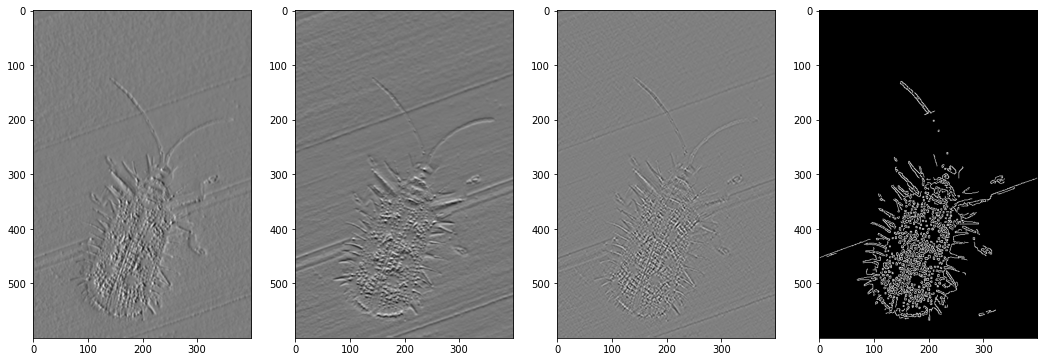

In [24]:

    img_blur = cv2.GaussianBlur(image_gray, (3,3), 0) 
 
    # Sobel Edge Detection
    sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
    sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
    sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

    
    fig, axs = plt.subplots (1,4,figsize=(18,12))
    
    # Display Sobel Edge Detection Images
    axs[0].imshow(sobelx,cmap='gray')
    axs[1].imshow(sobely,cmap='gray')
    axs[2].imshow(sobelxy,cmap='gray')

    # Canny Edge Detection
    edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection

    # Display Canny Edge Detection Image
    axs[3].imshow(edges,cmap='gray')
    plt.show()
 
